<h1 style="border: 2px solid cyan; border-radius: 8px; padding: 8px; text-align: center;"> Exploratory Data Analysis and Visualization Showcase </h1>


In [20]:
import numpy as np
import pandas as pd

## 1| Data Selection


- Dataset Name: Algerian Forest Fires Dataset
- Data Source: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
- Brief Description: The Algerian forest fires dataset consists of 244 instances, with 122 instances for each of the two regions: Bejaia and Sidi Bel-abbes. The dataset covers a period from June 2012 to September 2012.


### Variable Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire


## 2| Data Loading and Transformation


- Note: I manually restructured the `Algerian_forest_fires_dataset_UPDATE.csv` file for better usability.

In [30]:
df = pd.read_csv(
    "./algerian+forest+fires+dataset/Algerian_forest_fires.csv",
    index_col=["day", "month", "year"],
)
bejaia_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Bejaia Region Dataset.csv",
    index_col=["day", "month", "year"],
)
sidi_bel_abbes_df = pd.read_csv(
    "./algerian+forest+fires+dataset/Sidi-Bel Abbes Region Dataset.csv",
    index_col=["day", "month", "year"],
)

In [31]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


In [23]:
bejaia_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [24]:
sidi_bel_abbes_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,5.892623,17.903279
std,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,4.832913,13.878868
min,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,0.100000,1.400000
25%,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,1.825000,7.400000
50%,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,4.600000,13.900000
75%,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,8.625000,23.875000
max,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,19.000000,68.000000


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>,
        <Axes: >]], dtype=object)

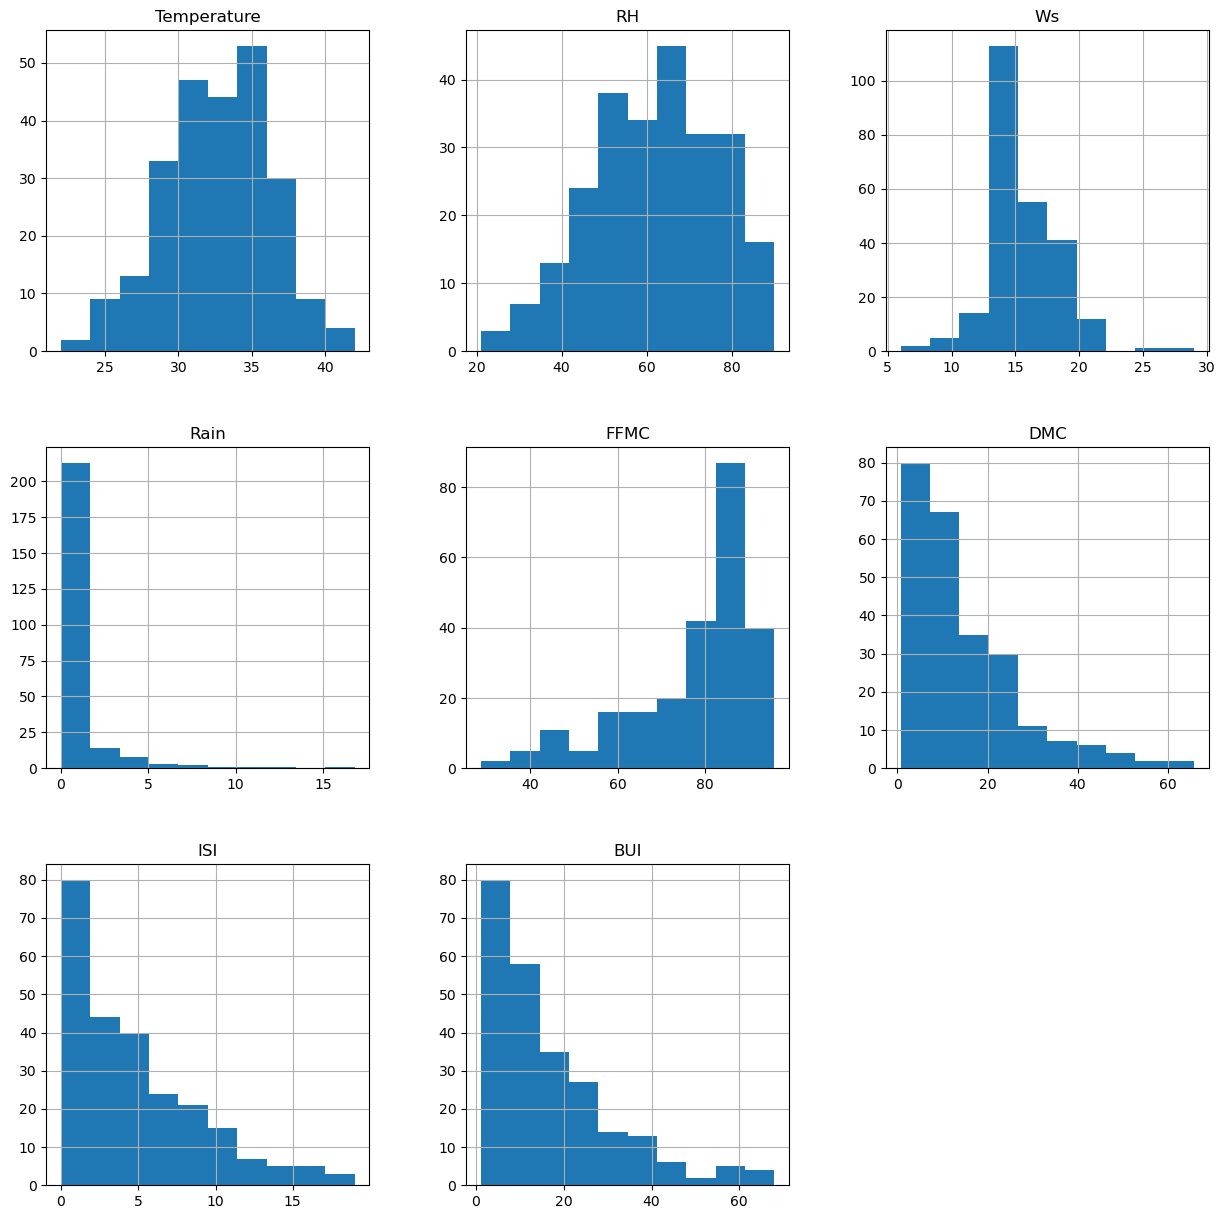

In [25]:
df.hist(figsize=(15,15))

In [26]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  '],
      dtype='object')